# Different Metric Evaluation over different Classfication models.
Here, I have discussed about different evaluation metrics like Precision, Recall, f1 score, f beta and receiver operator classification, how they work and can be implemented using numpy.

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

### Read the dataset
once again, we will use the spam classifier dataset.

In [7]:
# Read in our dataset
df = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)


### Instantiate a number of classification models

In [8]:
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

### Fit the model

In [9]:
naive_bayes = naive_bayes.fit(training_data, y_train)
bag_mod = bag_mod.fit(training_data, y_train)
rf_mod = rf_mod.fit(training_data, y_train)
ada_mod = ada_mod.fit(training_data, y_train)
svm_mod = svm_mod.fit(training_data, y_train)

### Prediction on the test data

In [10]:
preds_nb = naive_bayes.predict(testing_data)
preds_bg = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ad = ada_mod.predict(testing_data)
preds_sv = svm_mod.predict(testing_data)

## Metrics Calculation using Numpy
Now, Everything is setup to start the metric calculation. We will define the function for every metrics here, then we will call the function with appropriate parameter.

### Accuracy Score using numpy

In [15]:
def accuracy(actual, preds):
    return np.sum(preds == actual)/len(actual)

print("naive Bayes: ", accuracy(y_test, preds_nb))
print("bagging:     ", accuracy(y_test, preds_bg))
print("randomforest:", accuracy(y_test, preds_rf))
print("adaboost:    ", accuracy(y_test, preds_ad))
print("svm:         ", accuracy(y_test, preds_sv))

naive Bayes:  0.9885139985642498
bagging:      0.9748743718592965
randomforest: 0.9842067480258435
adaboost:     0.9770279971284996
svm:          0.8671931083991385


### Precision Score using numpy

In [16]:
def precision(actual, preds):
    totalPoints = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    predictedPoints = (preds==1).sum()
    return totalPoints/predictedPoints

print("naive Bayes: ", precision(y_test, preds_nb))
print("bagging:     ", precision(y_test, preds_bg))
print("randomforest:", precision(y_test, preds_rf))
print("adaboost:    ", precision(y_test, preds_ad))
print("svm:         ", precision(y_test, preds_sv))

naive Bayes:  0.9720670391061452
bagging:      0.9166666666666666
randomforest: 1.0
adaboost:     0.9693251533742331
svm:          nan


/home/rajat/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in long_scalars


### Recall Score using numpy

In [17]:
def recall(actual, preds):
    totalPoints = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    actualPoints = (actual==1).sum()
    return totalPoints/actualPoints

print("naive Bayes: ", recall(y_test, preds_nb))
print("bagging:     ", recall(y_test, preds_bg))
print("randomforest:", recall(y_test, preds_rf))
print("adaboost:    ", recall(y_test, preds_ad))
print("svm:         ", recall(y_test, preds_sv))

naive Bayes:  0.9405405405405406
bagging:      0.8918918918918919
randomforest: 0.8810810810810811
adaboost:     0.8540540540540541
svm:          0.0


### F1 Score using numpy

In [19]:
def f1(actual, preds):
    prec = precision(actual, preds)
    rec = recall(actual, preds)
    return 2*(prec*rec)/(prec + rec)

print("naive Bayes: ", f1(y_test, preds_nb))
print("bagging:     ", f1(y_test, preds_bg))
print("randomforest:", f1(y_test, preds_rf))
print("adaboost:    ", f1(y_test, preds_ad))
print("svm:         ", f1(y_test, preds_sv))

naive Bayes:  0.9560439560439562
bagging:      0.9041095890410958
randomforest: 0.9367816091954023
adaboost:     0.9080459770114943
svm:          nan


/home/rajat/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in long_scalars


### F beta Score using sklearn

In [22]:
# import fbeta_score
from sklearn.metrics import fbeta_score

print(fbeta_score(preds_nb, y_test, beta = 0.5))

0.9466811751904244


### Receiver Operator Classification

### Import libraries

In [23]:
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp

In [38]:
def build_roc_auc(y_test, y_preds):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(y_test)):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_preds)
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        plt.plot(fpr[2], tpr[2], color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.show()
        
        return roc_auc_score(y_test, y_preds)

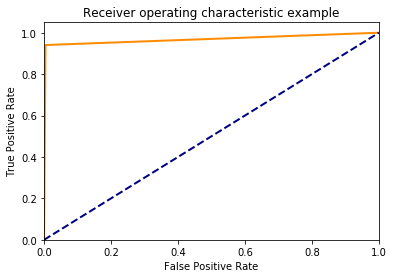

0.9682007338464294


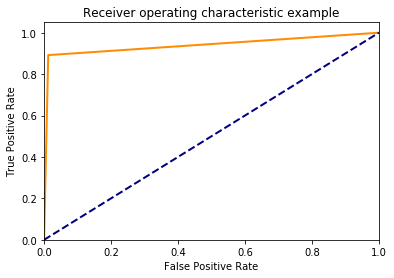

0.9397373366744228


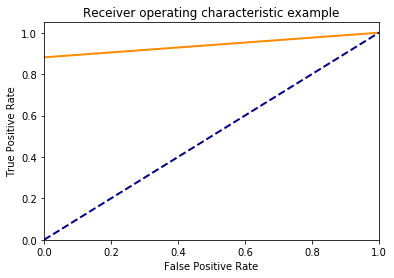

0.9405405405405405


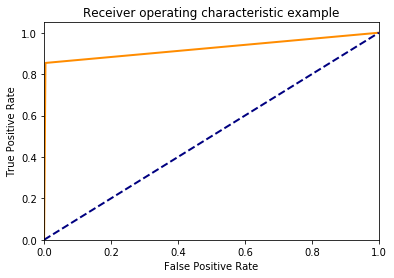

0.9249574906031861


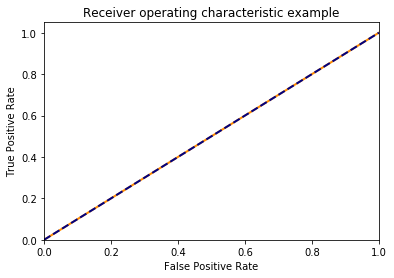

0.5


In [42]:
result = build_roc_auc(y_test, np.round(preds_nb))
print(result)
result = build_roc_auc(y_test, np.round(preds_bg))
print(result)
result = build_roc_auc(y_test, np.round(preds_rf))
print(result)
result = build_roc_auc(y_test, np.round(preds_ad))
print(result)
result = build_roc_auc(y_test, np.round(preds_sv))
print(result)
